In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the tables
ev_population_data=pd.read_csv("/content/drive/MyDrive/Electric_Vehicle_Population_Data (2).csv")
education_data=pd.read_csv("/content/drive/MyDrive/WA_education_21.xlsx - Sheet1.csv")
income_data=pd.read_csv("/content/drive/MyDrive/wa_income_clean.xlsx - Sheet 1 - wa_income.csv")
charging_stations=pd.read_csv("/content/drive/MyDrive/alt_fuel_stations (Oct 4 2023) - alt_fuel_stations (Oct 4 2023).csv")

#Drop columns
ev_population_data = ev_population_data.drop(['Base MSRP'],axis=1)
# charging_stations=charging_stations.drop(['Status Code','Expected Data','NG Fill Type Code','EV Level1 EVSE Num','EV Level2 EVSE Num','EV DC Fast Count','EV Other Info','EV Network','EV Network Web','Owner Type','Federal Agency ID','Federal Agency Name','Hydrogen Status Link','LPG Primary','E85 Blender Pump','EV Connector Types','Intersection Direction(French)','Access Days','BD Blends(French)'],axis=1)
#Data Cleaning
ev_population_data=ev_population_data.dropna(subset=['VIN (1-10)','City','Make','Model','Year', 'Electric Vehicle Type','Electric Range','County','City'])
charging_stations=charging_stations.dropna(subset=['ZIP','Station Name','State','Street Address','City'])




#Only take the washington state in charging stations
charging_stations=charging_stations[charging_stations['State']=='WA']

#Rename column with zip  to zip code
# ev_population_data=ev_population_data.rename(columns={'Postal Code':'zipcode'})
# charging_stations=charging_stations.rename(columns={'ZIP':'zipcode'})

income_data.rename(columns={'ZIP_CODE':'ZIP'},inplace=True)
income_data=income_data.rename(columns={'Median Income':'Median_Income'})
income_data=income_data.rename(columns={'name':'NAME'})
income_data=income_data.rename(columns={'PO_NAME':'City'})
# Delete first two rows of income and make third row as column header
# income_data=income_data.iloc[1:]


# income_data.columns=income_data.iloc[0]
#Reset Index
# income_data=income_data.reset_index(drop=True)

#  income_data.drop(0, axis=0, inplace=True)

# charging_stations.head(5)
# ev_population_data.head(5)
#print(len(ev_population_data))
#print(len(charging_stations))

education_data=education_data.drop(education_data.index[:3])
income_data.head(5)
# education_data.head(5)

<ipython-input-3-15b8bf51bd81>:5: DtypeWarning: Columns (6,16,20,31,33,43,46,49,52,57,58,60,62,65,67,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_stations=pd.read_csv("/content/drive/MyDrive/alt_fuel_stations (Oct 4 2023) - alt_fuel_stations (Oct 4 2023).csv")


,NAME,Median_Income,Number of Households,zcta,ZIP,City,STATE,ZIP_TYPE,x
0,ZCTA5 98001,95605,11820,98001,98001,Auburn,WA,Zip Code Area,0
1,ZCTA5 98002,59742,14012,98002,98002,Auburn,WA,Zip Code Area,0
2,ZCTA5 98003,63289,18988,98003,98003,Federal Way,WA,Zip Code Area,0
3,ZCTA5 98004,154403,18125,98004,98004,Bellevue,WA,Zip Code Area,0
4,ZCTA5 98005,145152,8732,98005,98005,Bellevue,WA,Zip Code Area,0


In [ ]:
#Merge Education Table and Income Table based on city
edu_income=pd.merge(income_data,education_data,on='NAME')
edu_income.rename(columns={'S1501_C01_009E':'HighSchoolDiploma'},inplace=True)
edu_income.rename(columns={'S1501_C01_010E':'Somecollege_Nodegree'},inplace=True)
edu_income.rename(columns={'S1501_C01_012E':'Bachelors Degree'},inplace=True)
edu_income.rename(columns={'S1501_C01_013E':'Graduate'},inplace=True)
edu_income.head(5)

,NAME,Median_Income,Number of Households,zcta,ZIP,City,STATE,ZIP_TYPE,x,HighSchoolDiploma,Somecollege_Nodegree,Bachelors Degree,Graduate
0,ZCTA5 98001,95605,11820,98001,98001,Auburn,WA,Zip Code Area,0,6103,6102,5157,1772
1,ZCTA5 98002,59742,14012,98002,98002,Auburn,WA,Zip Code Area,0,7836,6204,2752,1229
2,ZCTA5 98003,63289,18988,98003,98003,Federal Way,WA,Zip Code Area,0,9753,7385,6535,2649
3,ZCTA5 98004,154403,18125,98004,98004,Bellevue,WA,Zip Code Area,0,2139,3104,10852,11090
4,ZCTA5 98005,145152,8732,98005,98005,Bellevue,WA,Zip Code Area,0,1109,1351,5607,5606


In [ ]:
##DEMAND Analysis
ev_count_percity=ev_population_data.groupby('City').size().reset_index(name='EV Count')
# ev_count_percounty=ev_population_data.groupby('County').size.reset_index(name='EV Count')

In [ ]:
##Supply Analysis
charging_count_percity=charging_stations.groupby('City').size().reset_index(name='Charging Stations Count')
# charging_count_percounty=charging_stations.groupby('County').size.reset_index(name='Charging Stations Count')

In [ ]:
#Merge demand and supply dataframes on city or county
city_analysis=pd.merge(ev_count_percity,charging_count_percity,on='City')
# county_analysis=pd.merge(ev_count_percounty,charging_count_percounty,on='County')
city_analysis.tail(5)

,City,EV Count,Charging Stations Count
184,Winthrop,67,4
185,Woodinville,2024,15
186,Yakima,552,21
187,Yelm,220,1
188,Zillah,25,2


In [ ]:
# Replace NaN with 0 for cities or counties without either EVs or charging stations
city_analysis.fillna(0, inplace=True)
# county_analysis.fillna(0, inplace=True)

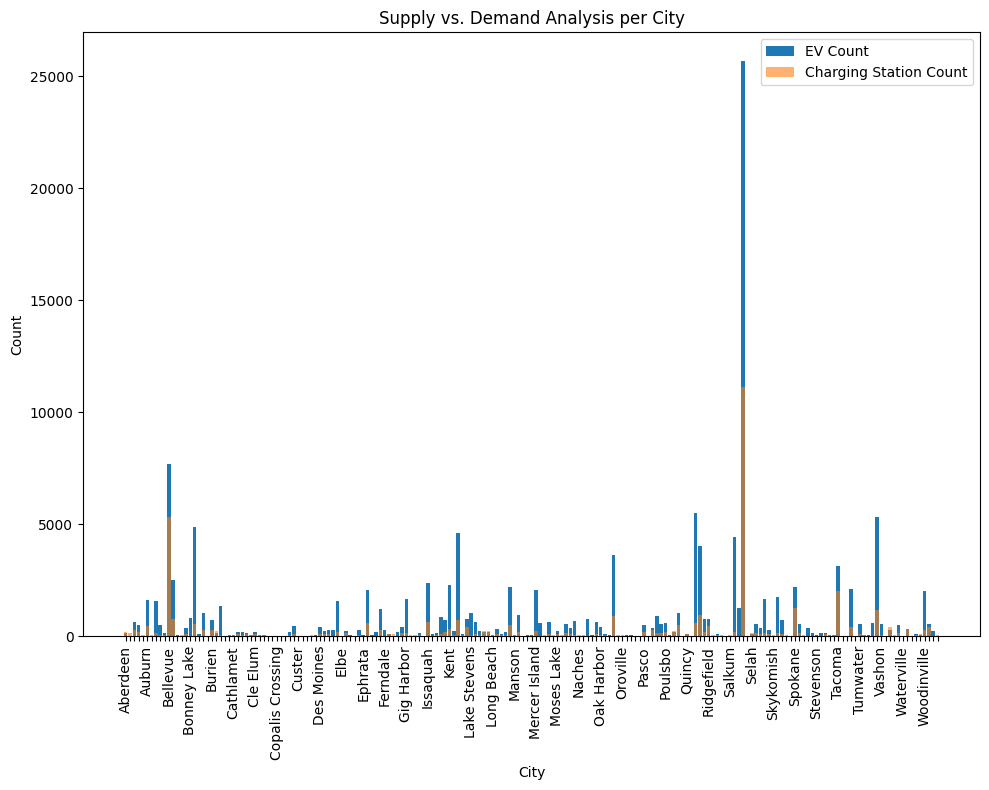

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

plt.bar(city_analysis['City'], city_analysis['EV Count'], label='EV Count')
plt.bar(city_analysis['City'], 20*city_analysis['Charging Stations Count'], label='Charging Station Count', alpha=0.6)
# Define the number of cities to skip on the x-axis
n = 5  # You can adjust n to control the density of x-axis labels

# Create a sparse list of labels, where every nth label is kept
sparse_labels = [label if i % n == 0 else '' for i, label in enumerate(city_analysis['City'])]
plt.xticks(ticks=np.arange(len(city_analysis['City'])), labels=sparse_labels, rotation=90)
# plt.xticks(rotation=90)  # Rotate the x-axis labels for better legibility
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Supply vs. Demand Analysis per City')
plt.legend()
plt.tight_layout()  # Adjust the layout to make sure there's enough room for the x-axis labels
plt.show()

In [ ]:
#Merge tables EV_Count ,charging_stations count with their cities



,VIN (1-10),County,City_x,State_x,zipcode,Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging
1296616,5YJSA1E57M,Grays Harbor,Moclips,WA,98562.0,2021,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
1296617,5YJSA1E57M,Grays Harbor,Moclips,WA,98562.0,2021,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1296618,1G1RA6E46F,Lincoln,Sprague,WA,99032.0,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
1296619,3FMTK3SU0N,Douglas,Bridgeport,WA,98813.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
1296620,5YJ3E1EB7N,Grays Harbor,Quinault,WA,98575.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,True,NaN,NaN,NaN,NaN,Olympic National Park,NaN,NaN,LD,False


In [ ]:

# Calculate ratios or percentages
city_analysis['Ratio of EVs to Charging Stations'] = city_analysis['EV Count'] / city_analysis['Charging Stations Count'].replace(0, 1)
city_analysis['Percent of EVs per City'] = (city_analysis['EV Count'] / city_analysis['EV Count'].sum()) * 100
city_analysis['Percent of Stations per City'] = (city_analysis['Charging Stations Count'] / city_analysis['Charging Stations Count'].sum()) * 100


# city_analysis.head(10)
city_analysis.tail(5)

,City,EV Count,Charging Stations Count,Ratio of EVs to Charging Stations,Percent of EVs per City,Percent of Stations per City
184,Winthrop,67,4,16.750000,0.048449,0.185443
185,Woodinville,2024,15,134.933333,1.463591,0.695410
186,Yakima,552,21,26.285714,0.399161,0.973574
187,Yelm,220,1,220.000000,0.159086,0.046361
188,Zillah,25,2,12.500000,0.018078,0.092721


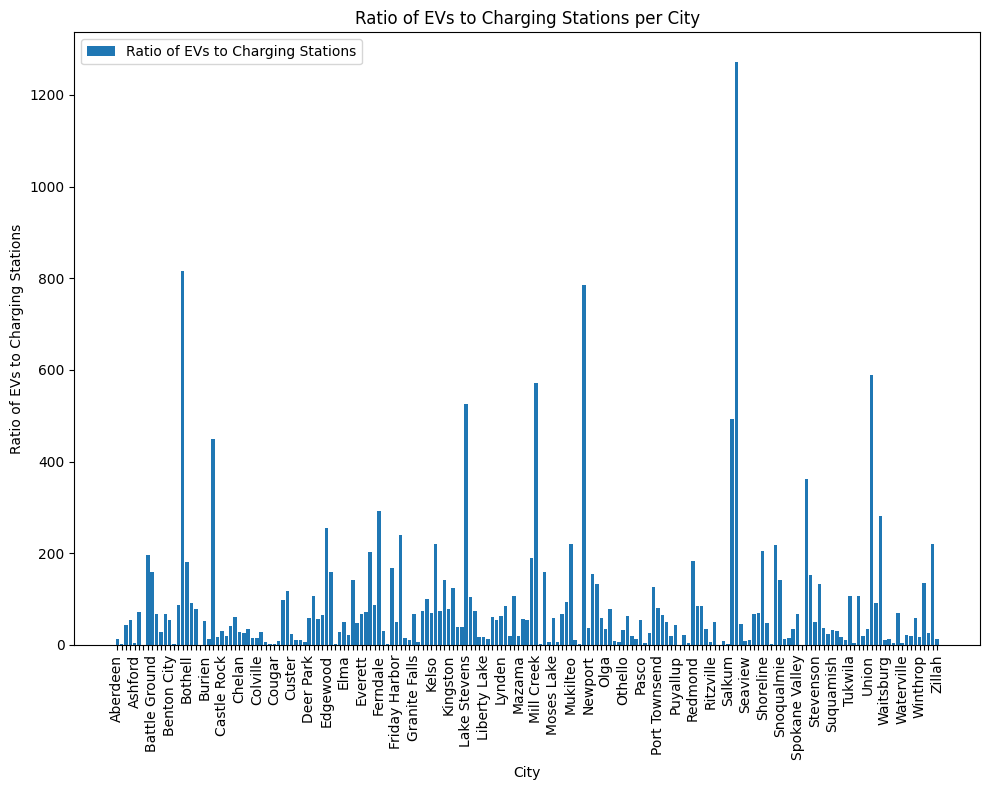

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

plt.bar(city_analysis['City'], city_analysis['Ratio of EVs to Charging Stations'], label='Ratio of EVs to Charging Stations')

# Define the number of cities to skip on the x-axis
n =4  # You can adjust n to control the density of x-axis labels

# Create a sparse list of labels, where every nth label is kept
sparse_labels = [label if i % n == 0 else '' for i, label in enumerate(city_analysis['City'])]
plt.xticks(ticks=np.arange(len(city_analysis['City'])), labels=sparse_labels, rotation=90)
# plt.xticks(rotation=90)  # Rotate the x-axis labels for better legibility
plt.xlabel('City')
plt.ylabel('Ratio of EVs to Charging Stations')
plt.title('Ratio of EVs to Charging Stations per City')
plt.legend()
plt.tight_layout()  # Adjust the layout to make sure there's enough room for the x-axis labels
plt.show()

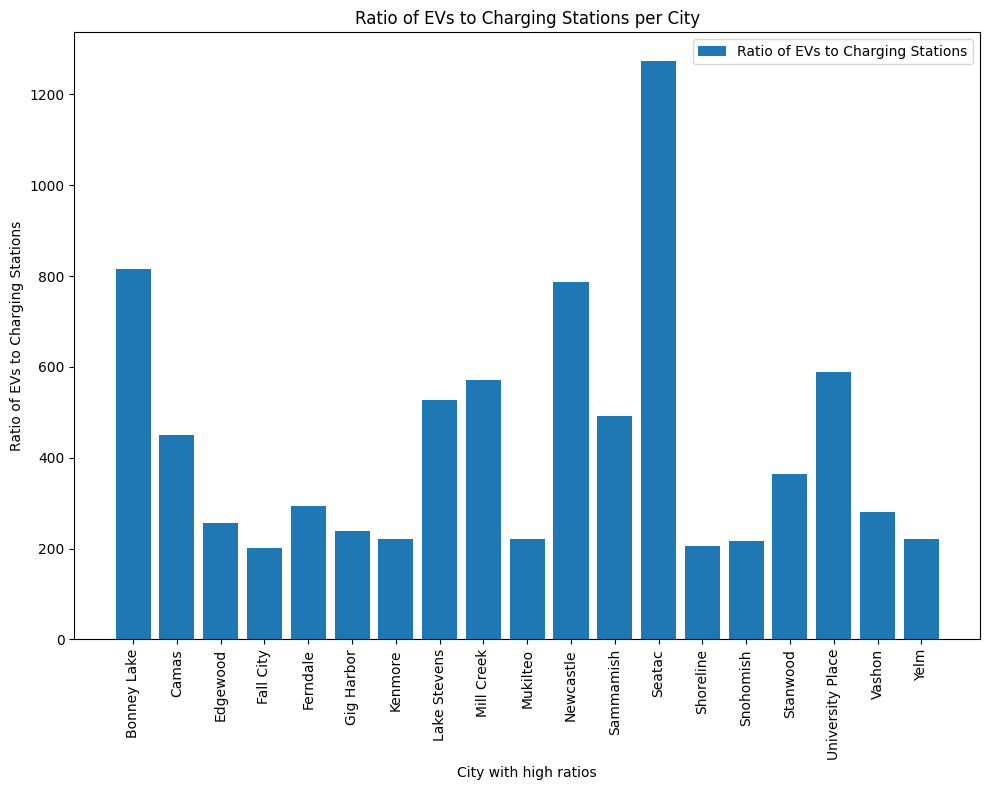

In [ ]:
#filter out the cities which have high ratio and requires more charging stations
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
# Threshold for high ratio
high_ratio_threshold = 200

# Filter out cities with a high EV to Charging Station ratio
high_ratio_cities =city_analysis[city_analysis['Ratio of EVs to Charging Stations'] > high_ratio_threshold]
plt.bar(high_ratio_cities['City'], high_ratio_cities['Ratio of EVs to Charging Stations'], label='Ratio of EVs to Charging Stations')

# Define the number of cities to skip on the x-axis
n = 5  # You can adjust n to control the density of x-axis labels

# Create a sparse list of labels, where every nth label is kept
sparse_labels = [label if i % n == 0 else '' for i, label in enumerate(high_ratio_cities['City'])]
plt.xticks(ticks=np.arange(len(high_ratio_cities['City'])), rotation=90)


plt.xlabel('City with high ratios')
plt.ylabel('Ratio of EVs to Charging Stations')
plt.title('Ratio of EVs to Charging Stations per City')
plt.legend()
plt.tight_layout()  # Adjust the layout to make sure there's enough room for the x-axis labels
plt.show()

In [ ]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(city_analysis['EV Count'], city_analysis['Charging Stations Count'])
print(f"Spearman's rank correlation coefficient: {correlation}")


Spearman's rank correlation coefficient: 0.7135930417983278


In [ ]:
from scipy.stats import pearsonr
# Calculate Pearson correlation
corr_coefficient, p_value = pearsonr(city_analysis['EV Count'], city_analysis['Charging Stations Count'])

# Output the result
print(f'Pearson correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.9327692584207435
P-value: 8.526123104138706e-85


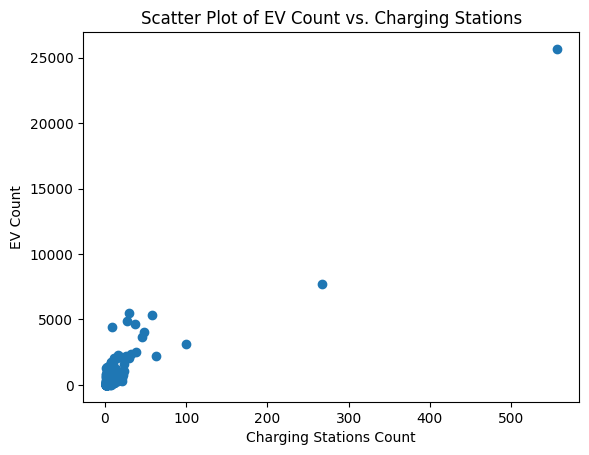

In [ ]:
# Create a scatter plot
plt.scatter(city_analysis['Charging Stations Count'],city_analysis['EV Count'])


# Add title and labels to the plot
plt.title('Scatter Plot of EV Count vs. Charging Stations')
plt.ylabel('EV Count')
plt.xlabel('Charging Stations Count')

# Show the plot
plt.show()


In [ ]:
#Merge fields from income,ev_population and Eduaction

data_merge = pd.merge(city_analysis[['City', 'EV Count','Charging Stations Count']], edu_income[['City', 'Median_Income', 'HighSchoolDiploma','Somecollege_Nodegree','Bachelors Degree','Graduate']], on='City')
data_merge.head(5)

,City,EV Count,Charging Stations Count,Median_Income,HighSchoolDiploma,Somecollege_Nodegree,Bachelors Degree,Graduate
0,Aberdeen,130,10,50510,6747,4293,1418,1060
1,Airway Heights,22,7,51897,1908,1969,347,298
2,Anacortes,617,14,82638,3146,4200,4647,3123
3,Arlington,489,9,93015,10416,9010,4158,2066
4,Ashford,10,2,80750,518,90,239,55


R-squared_rf: 0.8584139407506111
R-squared_lm: -0.08077829303143846
R-squared_svr: -0.1877906841211363
R-squared_gbr: 0.9125960877265523
Mean Squared Error_rf: 91.85332666666667
Mean Squared Error_lm: 701.1501141450657
Mean Squared Error_svr: 770.57392725388
Mean Squared Error_gbr: 56.702899625566836
MAE using sklearn rf: 5.989333333333333
MAE using sklearn lm: 16.72941538195375
MAE using sklearn svr: 17.694633442425395
MAE using sklearn GB regressor: 4.951524709033028


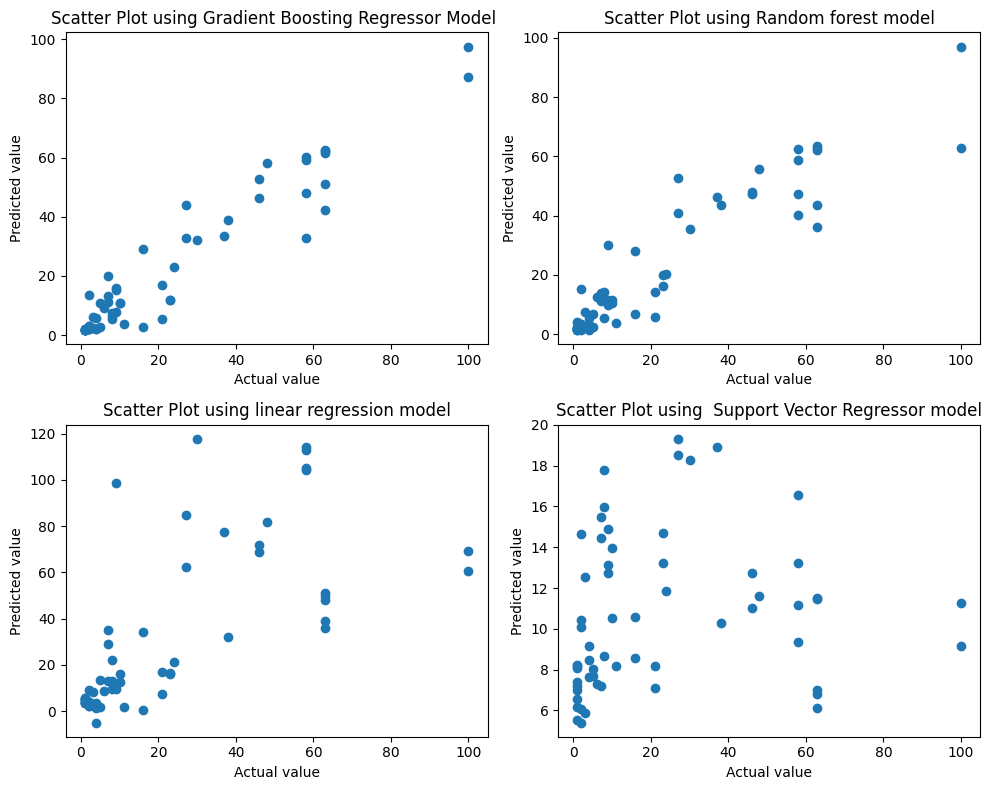

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def train_model(X_train, y_train, X_test, y_test, model_type = 'Ridge'):
  if model_type == 'Ridge':

    model = Ridge(alpha=0.7)  # You can adjust alpha as needed
  elif model_type == 'random_forest':
    model = RandomForestRegressor()
  elif model_type == 'Linear_regression':
    model=LinearRegression()
  elif model_type == 'SVR':
    model=SVR(kernel='rbf')
  elif model_type == 'GB_regressor':
    model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r_squared = r2_score(y_test, y_pred)
  return model, mse,mae, r_squared, y_pred



#  is your merged dataset with the necessary columns.
X = data_merge[['Median_Income','EV Count','HighSchoolDiploma','Somecollege_Nodegree','Bachelors Degree','Graduate']]
y = data_merge['Charging Stations Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


max_value_index = y_test.idxmax()  # idxmax() returns the index of the first occurrence of the maximum value
y_test = y_test.drop(max_value_index)
X_test = X_test.drop(max_value_index)


# model_ridge, mse_ridge,mae_ridge,r_squared_ridge, y_pred_ridge=train_model(X_train,y_train,X_test, y_test, model_type='Ridge')
model_rf, mse_rf,mae_rf, r_squared_rf, y_pred_rf=train_model(X_train,y_train,X_test, y_test, model_type='random_forest')
model_lm, mse_lm,mae_lm, r_squared_lm, y_pred_lm=train_model(X_train,y_train,X_test, y_test, model_type='Linear_regression')
model_svr, mse_svr,mae_svr, r_squared_svr, y_pred_svr=train_model(X_train,y_train,X_test, y_test, model_type='SVR')
model_GB_regressor, mse_GB_regressor,mae_GB_regressor, r_squared_GB_regressor, y_pred_GB_regressor=train_model(X_train,y_train,X_test, y_test, model_type='GB_regressor')


# Calculate the performance metric, e.g., Mean Squared Error

# print(f"R-squared_ridge: {r_squared_ridge}")
print(f"R-squared_rf: {r_squared_rf}")
print(f"R-squared_lm: {r_squared_lm}")
print(f"R-squared_svr: {r_squared_svr}")
print(f"R-squared_gbr: {r_squared_GB_regressor}")




# print(f"Mean Squared Error_ridge: {mse_ridge}")
print(f"Mean Squared Error_rf: {mse_rf}")
print(f"Mean Squared Error_lm: {mse_lm}")
print(f"Mean Squared Error_svr: {mse_svr}")
print(f"Mean Squared Error_gbr: {mse_GB_regressor}")




# print(f"MAE using sklearn: {mae_ridge}")
print(f"MAE using sklearn rf: {mae_rf}")
print(f"MAE using sklearn lm: {mae_lm}")
print(f"MAE using sklearn svr: {mae_svr}")
print(f"MAE using sklearn GB regressor: {mae_GB_regressor}")

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid of subplots

# Scatter plot in the first subplot (top left)
axs[0, 0].scatter(y_test, y_pred_GB_regressor)
axs[0, 0].set_title('Scatter Plot using Gradient Boosting Regressor Model ')
axs[0, 0].set_xlabel('Actual value')
axs[0, 0].set_ylabel('Predicted value')

# Scatter plot in the second subplot (top right)
axs[0, 1].scatter(y_test, y_pred_rf)
axs[0, 1].set_title('Scatter Plot using Random forest model')
axs[0, 1].set_xlabel('Actual value')
axs[0, 1].set_ylabel('Predicted value')

# Scatter plot in the third subplot (bottom left)
axs[1, 0].scatter(y_test, y_pred_lm)
axs[1, 0].set_title('Scatter Plot using linear regression model')
axs[1, 0].set_xlabel('Actual value')
axs[1, 0].set_ylabel('Predicted value')


# Scatter plot in the third subplot (bottom right)
axs[1, 1].scatter(y_test, y_pred_svr)
axs[1, 1].set_title('Scatter Plot using  Support Vector Regressor model')
axs[1, 1].set_xlabel('Actual value')
axs[1, 1].set_ylabel('Predicted value')



# fig.delaxes(axs[2, 1])
# Adjusting layout
plt.tight_layout()

# Displaying the plots
plt.show()
plt.savefig('ML_Model.png')




In [ ]:

##To check if EV Count have any relation with Median_Income and Education

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def train_model(X_train, y_train, X_test, y_test, model_type = 'Ridge'):
  if model_type == 'Ridge':

    model = Ridge(alpha=0.7)  # You can adjust alpha as needed
  elif model_type == 'random_forest':
    model = RandomForestRegressor()
  elif model_type == 'Linear_regression':
    model=LinearRegression()
  elif model_type == 'SVR':
    model=SVR(kernel='rbf')
  elif model_type == 'GB_regressor':
    model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r_squared = r2_score(y_test, y_pred)
  return model, mse,mae, r_squared, y_pred



#  is your merged dataset with the necessary columns.
X = data_merge[['Median_Income','S1501_C01_012E']]
y = data_merge['EV Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


max_value_index = y_test.idxmax()  # idxmax() returns the index of the first occurrence of the maximum value
y_test = y_test.drop(max_value_index)
X_test = X_test.drop(max_value_index)


# model_ridge, mse_ridge,mae_ridge,r_squared_ridge, y_pred_ridge=train_model(X_train,y_train,X_test, y_test, model_type='Ridge')
model_rf, mse_rf,mae_rf, r_squared_rf, y_pred_rf=train_model(X_train,y_train,X_test, y_test, model_type='random_forest')
model_lm, mse_lm,mae_lm, r_squared_lm, y_pred_lm=train_model(X_train,y_train,X_test, y_test, model_type='Linear_regression')
model_svr, mse_svr,mae_svr, r_squared_svr, y_pred_svr=train_model(X_train,y_train,X_test, y_test, model_type='SVR')
model_GB_regressor, mse_GB_regressor,mae_GB_regressor, r_squared_GB_regressor, y_pred_GB_regressor=train_model(X_train,y_train,X_test, y_test, model_type='GB_regressor')


# Calculate the performance metric, e.g., Mean Squared Error

# print(f"R-squared_ridge: {r_squared_ridge}")
print(f"R-squared_rf: {r_squared_rf}")
print(f"R-squared_lm: {r_squared_lm}")
print(f"R-squared_svr: {r_squared_svr}")
print(f"R-squared_gbr: {r_squared_GB_regressor}")




# print(f"Mean Squared Error_ridge: {mse_ridge}")
print(f"Mean Squared Error_rf: {mse_rf}")
print(f"Mean Squared Error_lm: {mse_lm}")
print(f"Mean Squared Error_svr: {mse_svr}")
print(f"Mean Squared Error_gbr: {mse_GB_regressor}")




# print(f"MAE using sklearn: {mae_ridge}")
print(f"MAE using sklearn rf: {mae_rf}")
print(f"MAE using sklearn lm: {mae_lm}")
print(f"MAE using sklearn svr: {mae_svr}")
print(f"MAE using sklearn GB regressor: {mae_GB_regressor}")

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid of subplots

# Scatter plot in the first subplot (top left)
axs[0, 0].scatter(y_test, y_pred_GB_regressor)
axs[0, 0].set_title('Scatter Plot using Gradient Boosting Regressor Model ')
axs[0, 0].set_xlabel('Actual value')
axs[0, 0].set_ylabel('Predicted value')

# Scatter plot in the second subplot (top right)
axs[0, 1].scatter(y_test, y_pred_rf)
axs[0, 1].set_title('Scatter Plot using Random forest model')
axs[0, 1].set_xlabel('Actual value')
axs[0, 1].set_ylabel('Predicted value')

# Scatter plot in the third subplot (bottom left)
axs[1, 0].scatter(y_test, y_pred_lm)
axs[1, 0].set_title('Scatter Plot using linear regression model')
axs[1, 0].set_xlabel('Actual value')
axs[1, 0].set_ylabel('Predicted value')


# Scatter plot in the third subplot (bottom right)
axs[1, 1].scatter(y_test, y_pred_svr)
axs[1, 1].set_title('Scatter Plot using  Support Vector Regressor model')
axs[1, 1].set_xlabel('Actual value')
axs[1, 1].set_ylabel('Predicted value')



# fig.delaxes(axs[2, 1])
# Adjusting layout
plt.tight_layout()

# Displaying the plots
plt.show()
plt.savefig('ML_Model.png')


KeyError: ignored